<a href="https://colab.research.google.com/github/AbhijeetS1112/Mobile_price_range_prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Description**
###  In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.
###The objective is to find out some relation between features of a mobile phone  (eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# **Data Description** -

---



### **Battery_power** - Total energy a battery can store in one time measured in mAh
### **Blue** - Has bluetooth or not
### **Clock_speed** - speed at which microprocessor executes instructions
### **Dual_sim** - Has dual sim support or not
### **Fc** - Front Camera mega pixels
### **Four_g** - Has 4G or not
### **Int_memory** - Internal Memory in Gigabytes
### **M_dep** - Mobile Depth in cm
### **Mobile_wt** - Weight of mobile phone
### **N_cores** - Number of cores of processor
### **Pc** - Primary Camera mega pixels
### **Px_height** - Pixel Resolution Height
### **Px_width** - Pixel Resolution Width
### **Ram** - Random Access Memory in Mega Bytes
### **Sc_h** - Screen Height of mobile in cm
### **Sc_w** - Screen Width of mobile in cm
### **Talk_time** - longest time that a single battery charge will last
### **Three_g** - Has 3G or not
### **Touch_screen** - Has touch screen or not
### **Wifi** - Has wifi or not
### **Price_range** - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

## **Importing Basic Libraries**


In [4]:
import numpy as np # for mathematical calculation
import pandas as pd # for manipulation
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
%matplotlib inline 
sns.set() 
import warnings # For remove warnings
warnings.filterwarnings("ignore")

## **Mounting drive**

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/data_mobile_price_range.csv")

In [8]:
# For displaying all the columns
pd.set_option("display.max_columns",None)

In [9]:
# checking Top 5 values
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
#checking bottom 5 values
df.tail(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


## **Exploring data Analysis**

In [13]:
#checking shape of columns
print("Number of columns",df.shape[1])
print("Number of Rows",df.shape[0])

Number of columns 21
Number of Rows 2000


In [14]:
# Checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**So u can see above the dataset does not have any null values**

In [16]:
# Checking Statistical Information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


**So the px_height and sc_w  minimum values have equal to 0 . it seems wierd**

In [18]:
# target values
df["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d284df730>,
      dtype=object)

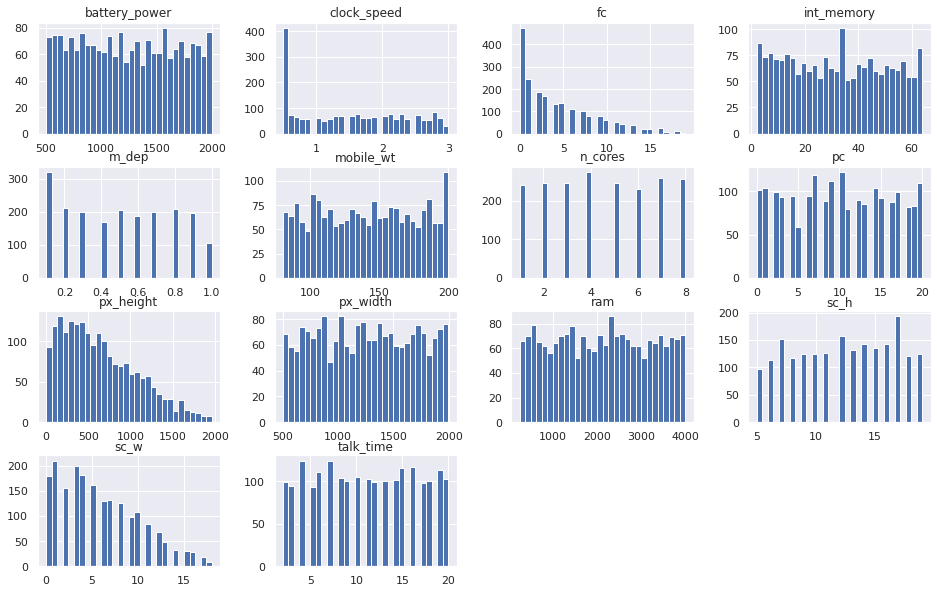

In [21]:
# plotting all the columns except categorical 
hist_plot=df.drop(["blue","dual_sim","four_g","three_g","touch_screen","wifi","price_range"],axis=1)
hist_plot.hist(figsize=[16,10],bins=30)

### Observing dependence of features on target variable (plotting only ones that show any relation with the target)

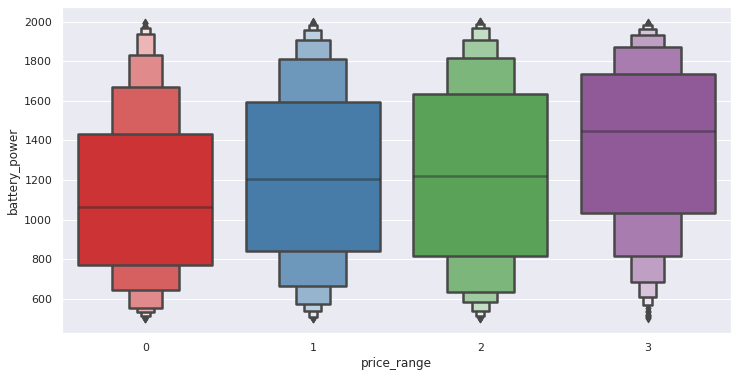

In [23]:
#plotting price range with battery
plt.figure(figsize=(12,6))
sns.boxenplot(data=df,x="price_range",y="battery_power",palette="Set1",linewidth=2.5)
plt.show()

**Replatively expensive phones have higher capacity batteries**

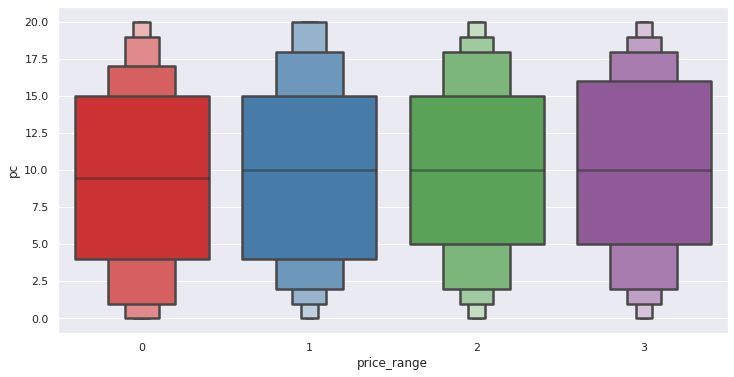

In [24]:
#plotting price range with primary camera pc
plt.figure(figsize=(12,6))
sns.boxenplot(data=df,x="price_range",y="pc",palette="Set1",linewidth=2.5)
plt.show()

**Most expensive (category 3) phones have better cameras.**

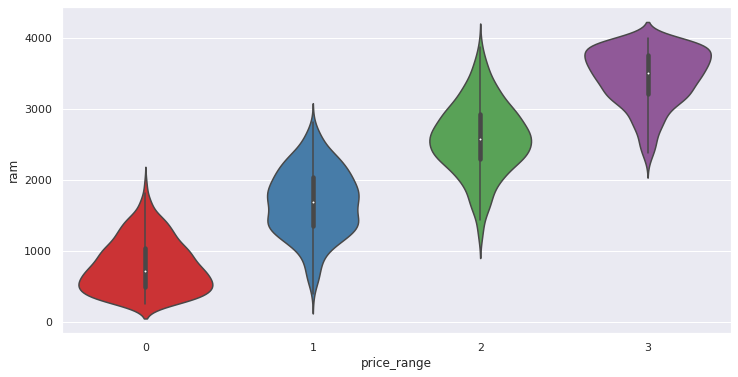

In [28]:
#plotting price range  with ram
plt.figure(figsize=(12,6))
sns.violinplot(data=df,x="price_range",y="ram",palette="Set1")
plt.show()

**Relatively expensive phones have much bigger rams.**

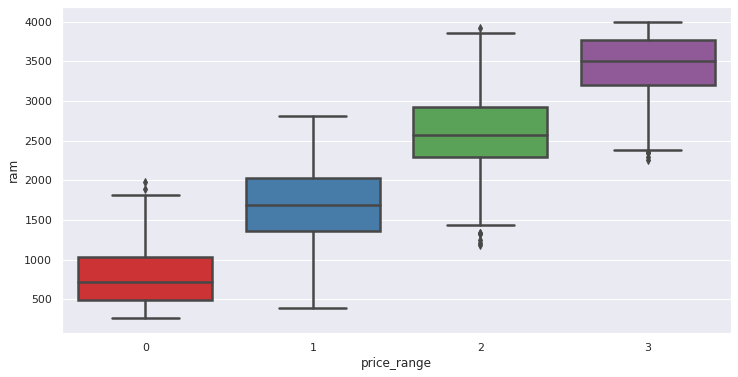

In [27]:
#plotting price range with pixwl resolution height
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x="price_range",y="ram",palette="Set1",linewidth=2.5)
plt.show()

**Expensive phones have better screen quality.**

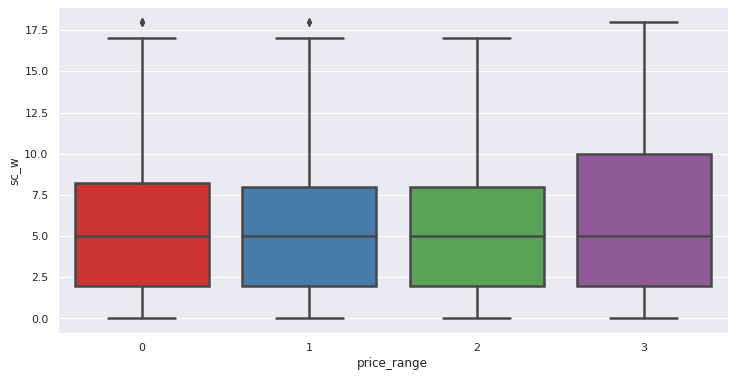

In [29]:
#plotting price range with screen width
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x="price_range",y="sc_w",palette="Set1",linewidth=2.5)
plt.show()

**Most expensive phones have wider screens.**

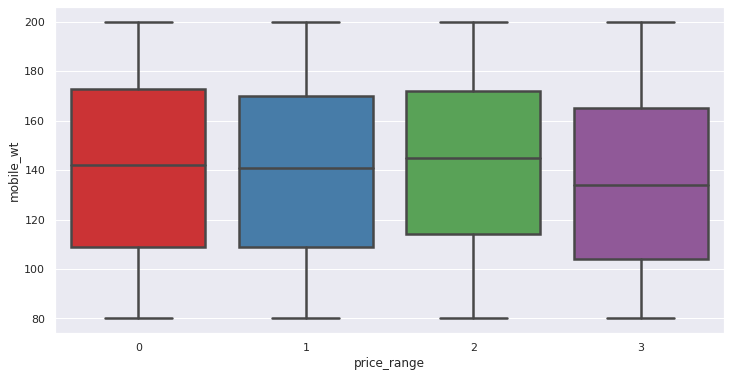

In [30]:
#plotting price range with mobile weight
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x="price_range",y="mobile_wt",palette="Set1",linewidth=2.5)
plt.show()

**Most exxpensive phones are lighter than the competition**